In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
A = [[1,2], 
     [2,3], 
     [3,4]]

B = [[1,2], 
     [2,3], 
     [4,5],
     [7,8],
     [4,7],
     [5,7],
     [6,2]]

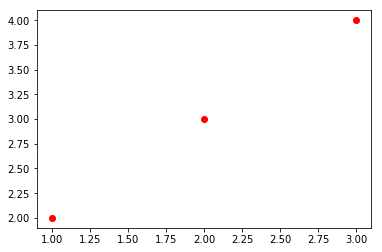

In [4]:
x_ax = [x for [x,y] in A]
y_ax = [y for [x,y] in A]
plt.plot(*zip(*A),'ro')

In [5]:
def transpose(x):
    
    if not isinstance(x[0],list):
        
        return [x]
        
        
    tmatrix = [[0 for i in range(len(x))] for j in range(len(x[0]))]
        
    for i in range(len(x)):
        for j in range(len(x[0])):
            tmatrix[j][i] = x[i][j]
                
    C = []        
    if len(tmatrix[0]) == 1:
        for item in tmatrix:
            C.append(item[0])
        
        return C
    
        
    return tmatrix 

In [6]:
def multiply(x,y):
    
    if not isinstance(y[0],list):
        
        y = [[num] for num in y]
    
    output = [[0 for i in range(len(y[0]))] for j in range(len(x))]
    
    for i in range(len(x)):
        for j in range(len(y[0])):
            for k in range(len(x[0])):
                
                output[i][j] += x[i][k]*y[k][j]
    C = []        
    if len(output[0]) == 1:
        for item in output:
            C.append(item[0])
        return C
    
    return output

In [7]:
def data_label_split(x):
    d = []
    l = []
    for item in x:
            d.append([item[0],1])
            l.append(item[1])
            
    return d,l            

In [8]:
def Minus(x,y):
    return [x[i]-y[i] for i in range(len(x))]

In [9]:
from copy import deepcopy
def invert(X):
    
    #copy X to avoid altering input
    X = deepcopy(X)

    #Get dimensions of X
    rows = len(X)
    cols = len(X[0])

    #Get the identity matrix and append it to the right of X
    #This is done because our row operations will make the identity into the inverse
    identity = make_identity(rows,cols)
    for i in range(0,rows):
        X[i]+=identity[i]

    i = 0
    for j in range(0,cols):
        print("On col {0} and row {1}".format(j,i))
        #Check to see if there are any nonzero values below the current row in the current column
        zero_sum, first_non_zero = check_for_all_zeros(X,i,j)
        #If everything is zero, increment the columns
        if zero_sum==0:
            if j==cols:
                return X
            raise Exception("Matrix is singular.")
        #If X[i][j] is 0, and there is a nonzero value below it, swap the two rows
        if first_non_zero != i:
            X = swap_row(X,i,first_non_zero)
        #Divide X[i] by X[i][j] to make X[i][j] equal 1
        X[i] = [m/X[i][j] for m in X[i]]

        #Rescale all other rows to make their values 0 below X[i][j]
        for q in range(0,rows):
            if q!=i:
                scaled_row = [X[q][j] * m for m in X[i]]
                X[q]= [X[q][m] - scaled_row[m] for m in range(0,len(scaled_row))]
        #If either of these is true, we have iterated through the matrix, and are done
        if i==rows or j==cols:
            break
        i+=1

    #Get just the right hand matrix, which is now our inverse
    for i in range(0,rows):
        X[i] = X[i][cols:len(X[i])]

    return X

def check_for_all_zeros(X,i,j):
    
    non_zeros = []
    first_non_zero = -1
    for m in range(i,len(X)):
        non_zero = X[m][j]!=0
        non_zeros.append(non_zero)
        if first_non_zero==-1 and non_zero:
            first_non_zero = m
    zero_sum = sum(non_zeros)
    return zero_sum, first_non_zero

def swap_row(X,i,p):
    
    X[p], X[i] = X[i], X[p]
    return X

def make_identity(r,c):
    
    identity = []
    for i in range(0,r):
        row = []
        for j in range(0,c):
            elem = 0
            if i==j:
                elem = 1
            row.append(elem)
        identity.append(row)
    return identity

In [10]:
def optimization(x,w,y):
    XtX = multiply(transpose(x),x)
    Xty = multiply(transpose(x), y)
    w = multiply(invert(XtX), Xty)
    return w

In [12]:
data,label = data_label_split(A)
X = data
y = label

In [27]:
m = 100
b = 100
w = [m,b]
Xw = multiply(X,w)
w = optimization(X,w,y)
py = multiply(X,w)
print(w)

On col 0 and row 0
On col 1 and row 1
[0.9999999999999982, 1.0000000000000036]


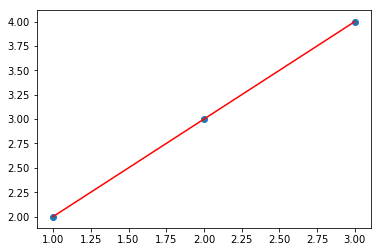

In [14]:
plt.scatter(x_ax,y_ax)
plt.plot(x_ax,py, 'r')
plt.show()

In [28]:
X2,y2 = data_label_split(B)

In [29]:
x2_ax = [x for [x,y] in B]
y2_ax = [y for [x,y] in B]

In [30]:
Xw = multiply(X2,w)
w = optimization(X2,w,y2)
py2 = multiply(X2,w)

On col 0 and row 0
On col 1 and row 1


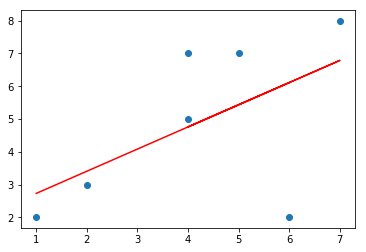

In [32]:
plt.scatter(x2_ax,y2_ax)
plt.plot(x2_ax,py2, 'r')
plt.show()

In [19]:
import pandas as pd

In [20]:
data = pd.read_csv('Table_1.csv')

In [21]:
X3 = []
p = data['Interest Rate'].dropna()
for i in range(len(p)):
    X3.append([float(p[i]),1])

In [22]:
k = data['Home Price'].dropna()
y3 = []
for i in range(len(k)):
    m = k.iloc[i][1:].replace(',','')
    y3.append(float(m))

In [23]:
Xw = multiply(X3,w)
w = optimization(X3,w,y3)
py3 = multiply(X3,w)

On col 0 and row 0
On col 1 and row 1


In [24]:
x3_ax = [x for [x,y] in X3]
y3_ax = y3

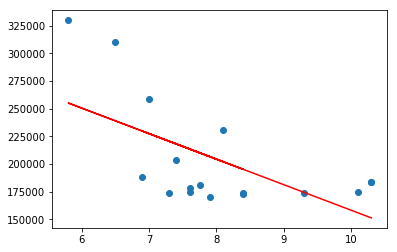

In [25]:
plt.scatter(x3_ax,y3_ax)
plt.plot(x3_ax,py3, 'r')
plt.show()